In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [9]:
df =  pd.read_csv('MSFT.csv')


In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9376,2023-05-25,323.239990,326.899994,320.000000,325.920013,325.920013,43301700
9377,2023-05-26,324.019989,333.399994,323.880005,332.890015,332.890015,36630600
9378,2023-05-30,335.230011,335.739990,330.519989,331.209991,331.209991,29503100
9379,2023-05-31,332.290009,335.940002,327.329987,328.390015,328.390015,45950600


In [11]:
df['Date']


0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9376    2023-05-25
9377    2023-05-26
9378    2023-05-30
9379    2023-05-31
9380    2023-06-01
Name: Date, Length: 9381, dtype: object

In [12]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime.datetime(1986, 3, 19, 0, 0)

datetime.datetime(1986, 3, 19, 0, 0)

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9376,2023-05-25,323.239990,326.899994,320.000000,325.920013,325.920013,43301700
9377,2023-05-26,324.019989,333.399994,323.880005,332.890015,332.890015,36630600
9378,2023-05-30,335.230011,335.739990,330.519989,331.209991,331.209991,29503100
9379,2023-05-31,332.290009,335.940002,327.329987,328.390015,328.390015,45950600


In [14]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9376   2023-05-25
9377   2023-05-26
9378   2023-05-30
9379   2023-05-31
9380   2023-06-01
Name: Date, Length: 9381, dtype: datetime64[ns]

In [15]:
df.index=df.pop('Date')

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...
2023-05-25,323.239990,326.899994,320.000000,325.920013,325.920013,43301700
2023-05-26,324.019989,333.399994,323.880005,332.890015,332.890015,36630600
2023-05-30,335.230011,335.739990,330.519989,331.209991,331.209991,29503100


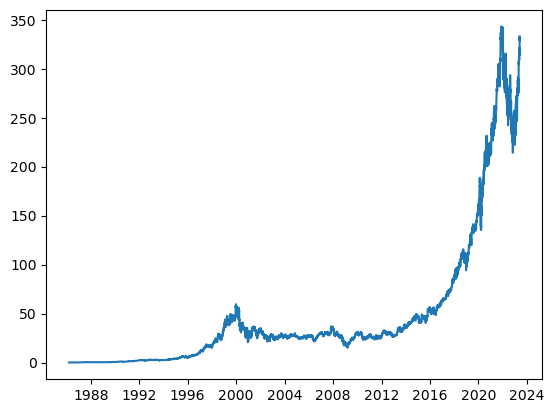

In [17]:
plt.plot(df.index, df['Close'])

In [18]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    
    dates = []
    X, Y = [], []
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return 
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break
            
        target_date = next_date
        
        if target_date == last_date:
            last_time = True
            
    ret_df = pd.DataFrame({})
    ret_df['Target Date']=dates
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
        
    ret_df['Target']=Y
    return ret_df
# Start day second time around:'2021-03-25'
windowed_df = df_to_windowed_df(df,
                                   '1986-03-18',
                                   '2022-03-23',
                                   n=3)

In [19]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape


((9079,), (9079, 3, 1), (9079,))

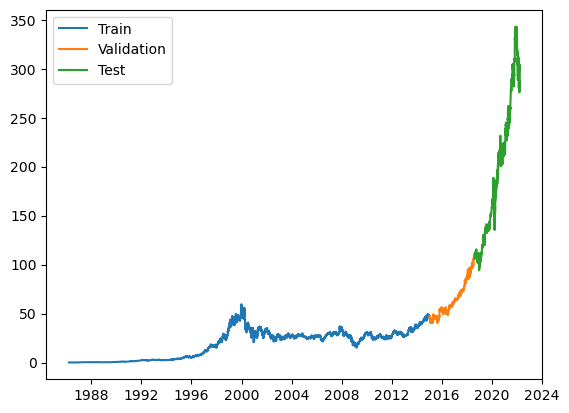

In [20]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val,  X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])